# EnKF Experiments - GCS benchmark

## Imports

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from scipy.stats import shapiro, kruskal
import seaborn as sns
import sys

In [2]:
sys.path.append('../../../../stationsim/')
from ensemble_kalman_filter import EnsembleKalmanFilter, AgentIncluder, GateEstimator, ExitRandomisation
from stationsim_gcs_model import Model

In [3]:
sys.path.append('../')
from experiment_utils import Modeller, Processor, Visualiser

In [4]:
%matplotlib inline
np.random.seed(42)

## Functions

In [5]:
def tidy_dataframe(df, independent_col: str, dependent_cols: list):
    output = list()
    
    for i, row in df.iterrows():
        for col in dependent_cols:
            d = {independent_col: row[independent_col],
                 'variable':  col,
                 'value': row[col]}
            output.append(d)
    
    output = pd.DataFrame(output)
    return output

## Data paths

In [6]:
data_dir = '../results/data/baseline/'
model_dir = '../results/models/baseline/'
fig_dir = '../results/figures/baseline/'

## Experiment 0 - Baseline

### Run experiment

#### Benchmark

Set population size to use for benchmarking:

In [7]:
p = 100

Run benchmark:

In [8]:
Modeller.run_enkf_benchmark(ensemble_size=100,
                            exit_randomisation=ExitRandomisation.BY_AGENT)

../../../../stationsim/ensemble_kalman_filter.py:193: RuntimeWarning: EnKF received unexpected attribute (vanilla_ensemble_size).
  warns.warn(w, RuntimeWarning)


Running Ensemble Kalman Filter...
max_iterations:	None
ensemble_size:	None
assimilation_period:	None
pop_size:	None
filter_type:	EnsembleKalmanFilterType.STATE
inclusion_type:	AgentIncluder.MODE_EN
ensemble_errors:	False


#### Collisions

In [27]:
# Modeller.run_model_collisions()

### Analysis

#### Benchmark

In [9]:
with open(model_dir + 'baseline.pkl', 'rb') as f:
    baseline_filter = pickle.load(f)

baseline_results = pd.DataFrame(baseline_filter.forecast_error)
baseline_results.head()

,time,forecast
0,0,0.000000
1,1,0.877366
2,2,0.872052
3,3,0.866923
4,4,0.861984


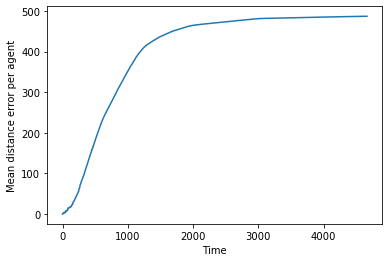

In [10]:
plt.figure()
sns.lineplot(x='time', y='forecast', data=baseline_results)
plt.xlabel('Time')
plt.ylabel('Mean distance error per agent')
plt.savefig(fig_dir + f'baseline_errors_{p}_by_agent.pdf')
plt.show()

Run benchmark:

In [11]:
Modeller.run_enkf_benchmark(ensemble_size=100,
                            exit_randomisation=ExitRandomisation.ALL_RANDOM)

../../../../stationsim/ensemble_kalman_filter.py:193: RuntimeWarning: EnKF received unexpected attribute (vanilla_ensemble_size).
  warns.warn(w, RuntimeWarning)


Running Ensemble Kalman Filter...
max_iterations:	None
ensemble_size:	None
assimilation_period:	None
pop_size:	None
filter_type:	EnsembleKalmanFilterType.STATE
inclusion_type:	AgentIncluder.MODE_EN
ensemble_errors:	False


#### Collisions

In [12]:
# Modeller.run_model_collisions()

### Analysis

#### Benchmark

In [13]:
with open(model_dir + 'baseline.pkl', 'rb') as f:
    baseline_filter = pickle.load(f)

baseline_results = pd.DataFrame(baseline_filter.forecast_error)
baseline_results.head()

,time,forecast
0,0,0.000000
1,1,2.557393
2,2,2.565082
3,3,2.572772
4,4,2.580463


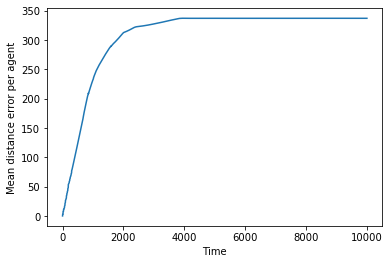

In [14]:
plt.figure()
sns.lineplot(x='time', y='forecast', data=baseline_results)
plt.xlabel('Time')
plt.ylabel('Mean distance error per agent')
plt.savefig(fig_dir + f'baseline_errors_{p}_all_random.pdf')
plt.show()

## Benchmarking filter without exit gate knowledge

Run benchmark:

In [8]:
Modeller.run_enkf_benchmark_filter(ensemble_size=100,
                                   exit_randomisation=ExitRandomisation.BY_AGENT)

../../../../stationsim/ensemble_kalman_filter.py:193: RuntimeWarning: EnKF received unexpected attribute (vanilla_ensemble_size).
  warns.warn(w, RuntimeWarning)


Running Ensemble Kalman Filter...
max_iterations:	None
ensemble_size:	None
assimilation_period:	None
pop_size:	None
filter_type:	EnsembleKalmanFilterType.STATE
inclusion_type:	AgentIncluder.MODE_EN
ensemble_errors:	False


#### Collisions

In [27]:
# Modeller.run_model_collisions()

### Analysis

#### Benchmark

In [9]:
with open(model_dir + 'baseline_filter.pkl', 'rb') as f:
    baseline_filter = pickle.load(f)

baseline_results = pd.DataFrame(baseline_filter.forecast_error)
baseline_results.head()

,time,forecast
0,0,0.000000
1,1,0.877366
2,2,0.872052
3,3,0.866923
4,4,0.861984


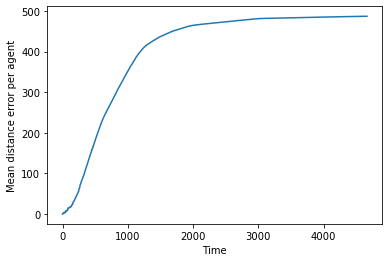

In [10]:
plt.figure()
sns.lineplot(x='time', y='forecast', data=baseline_results)
plt.xlabel('Time')
plt.ylabel('Mean distance error per agent')
plt.savefig(fig_dir + f'baseline_errors_{p}_by_agent_filter.pdf')
plt.show()

Run benchmark:

In [11]:
Modeller.run_enkf_benchmark(ensemble_size=100,
                            exit_randomisation=ExitRandomisation.ALL_RANDOM)

../../../../stationsim/ensemble_kalman_filter.py:193: RuntimeWarning: EnKF received unexpected attribute (vanilla_ensemble_size).
  warns.warn(w, RuntimeWarning)


Running Ensemble Kalman Filter...
max_iterations:	None
ensemble_size:	None
assimilation_period:	None
pop_size:	None
filter_type:	EnsembleKalmanFilterType.STATE
inclusion_type:	AgentIncluder.MODE_EN
ensemble_errors:	False


#### Collisions

In [12]:
# Modeller.run_model_collisions()

### Analysis

#### Benchmark

In [13]:
with open(model_dir + 'baseline_filter.pkl', 'rb') as f:
    baseline_filter = pickle.load(f)

baseline_results = pd.DataFrame(baseline_filter.forecast_error)
baseline_results.head()

,time,forecast
0,0,0.000000
1,1,2.557393
2,2,2.565082
3,3,2.572772
4,4,2.580463


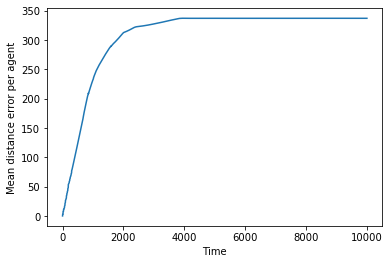

In [14]:
plt.figure()
sns.lineplot(x='time', y='forecast', data=baseline_results)
plt.xlabel('Time')
plt.ylabel('Mean distance error per agent')
plt.savefig(fig_dir + f'baseline_errors_{p}_all_random_filter.pdf')
plt.show()